In [109]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [111]:
dataset = pd.read_csv("/home/negi/Downloads/machine_learning/Classified Data")
print(dataset)

     Unnamed: 0       WTT       PTI       EQW       SBI       LQE       QWG  \
0             0  0.913917  1.162073  0.567946  0.755464  0.780862  0.352608   
1             1  0.635632  1.003722  0.535342  0.825645  0.924109  0.648450   
2             2  0.721360  1.201493  0.921990  0.855595  1.526629  0.720781   
3             3  1.234204  1.386726  0.653046  0.825624  1.142504  0.875128   
4             4  1.279491  0.949750  0.627280  0.668976  1.232537  0.703727   
5             5  0.833928  1.523302  1.104743  1.021139  1.107377  1.010930   
6             6  0.944705  1.251761  1.074885  0.286473  0.996440  0.428860   
7             7  0.816174  1.088392  0.895343  0.243860  0.943123  1.045131   
8             8  0.776551  1.463812  0.783825  0.337278  0.742215  1.072756   
9             9  0.772280  0.515111  0.891596  0.940862  1.430568  0.885876   
10           10  1.284999  1.331018  0.618910  0.657017  1.037191  0.717346   
11           11  1.064356  1.414885  0.896798  0.629

In [4]:
dataset.head()

,Unnamed: 0,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ,TARGET CLASS
0,0,0.913917,1.162073,0.567946,0.755464,0.780862,0.352608,0.759697,0.643798,0.879422,1.231409,1
1,1,0.635632,1.003722,0.535342,0.825645,0.924109,0.648450,0.675334,1.013546,0.621552,1.492702,0
2,2,0.721360,1.201493,0.921990,0.855595,1.526629,0.720781,1.626351,1.154483,0.957877,1.285597,0
3,3,1.234204,1.386726,0.653046,0.825624,1.142504,0.875128,1.409708,1.380003,1.522692,1.153093,1
4,4,1.279491,0.949750,0.627280,0.668976,1.232537,0.703727,1.115596,0.646691,1.463812,1.419167,1


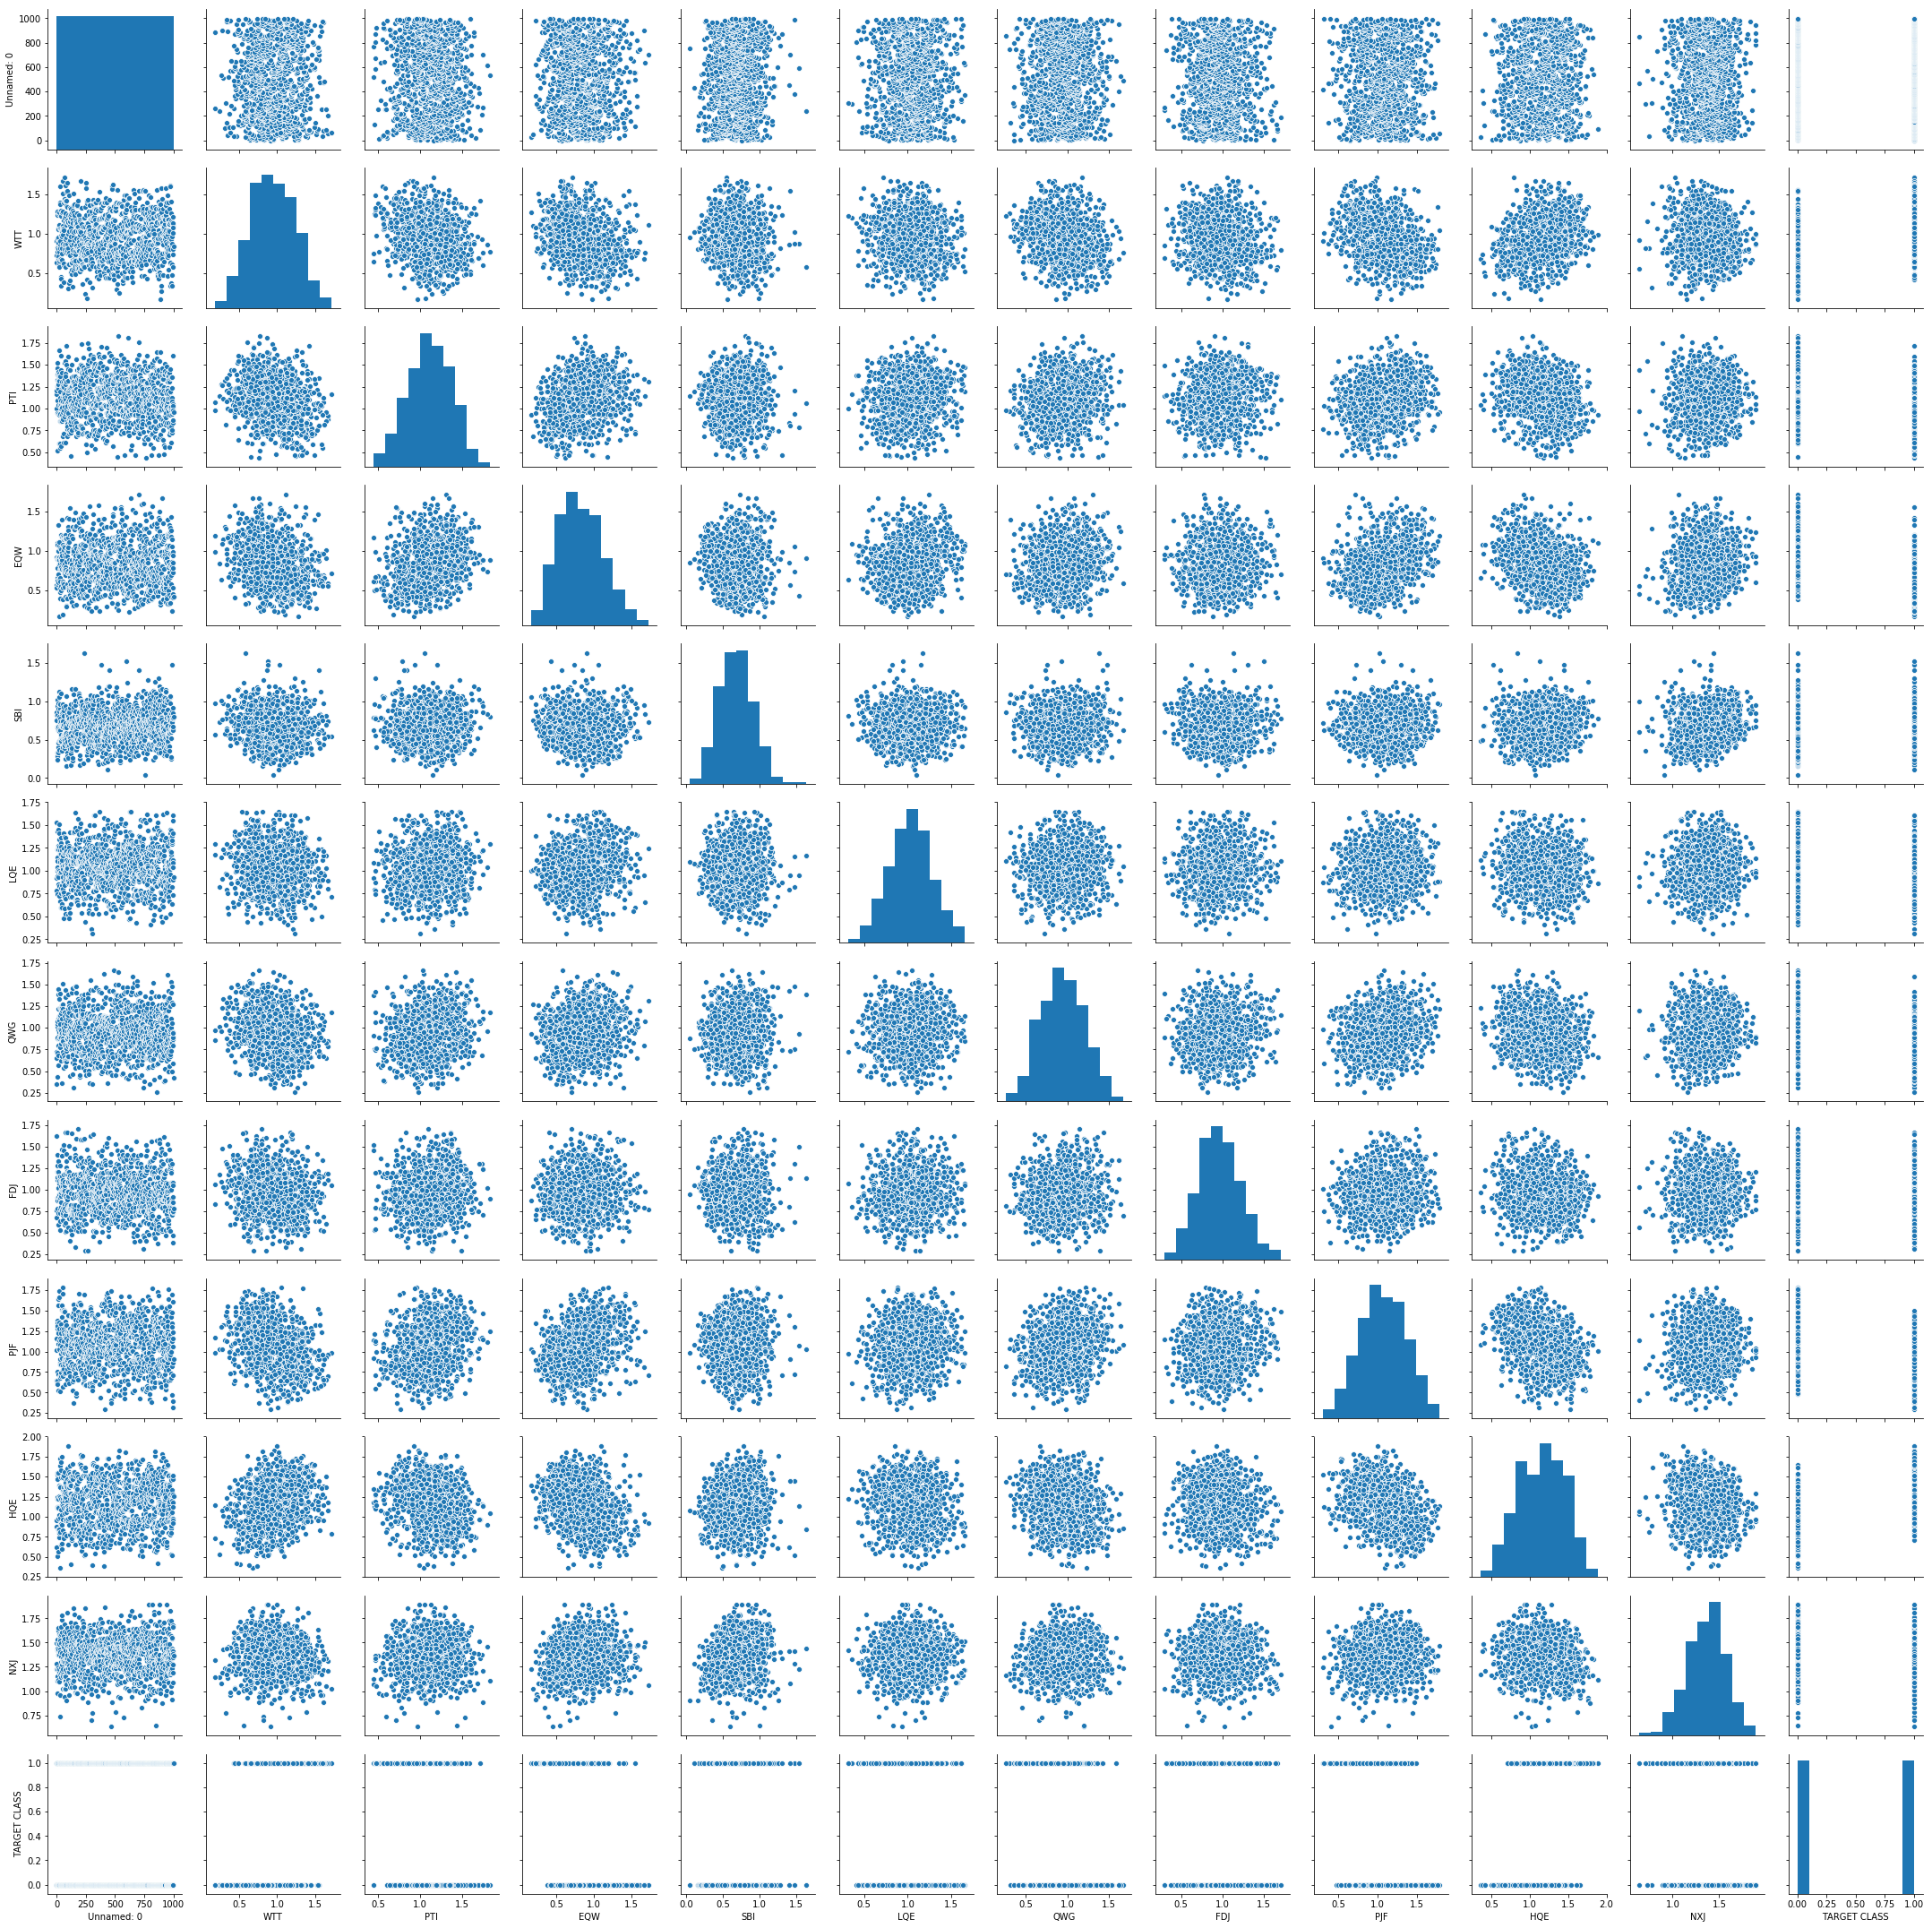

In [37]:
sns.pairplot(dataset)

In [6]:
from sklearn.preprocessing import StandardScaler

In [39]:
scaler = StandardScaler()
print(scaler)

StandardScaler(copy=True, with_mean=True, with_std=True)


In [41]:
scaler.fit(dataset.drop('TARGET CLASS',axis=1))

/home/negi/negi/lib/python3.5/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)


StandardScaler(copy=True, with_mean=True, with_std=True)

In [42]:
scaled_features = scaler.transform(dataset.drop('TARGET CLASS',axis=1))
print(scaled_features)

[[-1.73031962 -0.12354188  0.18590747 ... -1.48236813 -0.9497194
  -0.64331425]
 [-1.72685552 -1.08483602 -0.43034845 ... -0.20224031 -1.82805088
   0.63675862]
 [-1.72339142 -0.78870217  0.33931821 ...  0.28570652 -0.68249379
  -0.37784986]
 ...
 [ 1.72339142  0.64177714 -0.51308341 ... -2.36249443 -0.81426092
   0.11159651]
 [ 1.72685552  0.46707241 -0.98278576 ... -0.03677699  0.40602453
  -0.85567   ]
 [ 1.73031962 -0.38765353 -0.59589427 ... -0.56778932  0.3369971
   0.01034996]]


/home/negi/negi/lib/python3.5/site-packages/ipykernel_launcher.py:1: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  """Entry point for launching an IPython kernel.


In [43]:
dataset_feat = pd.DataFrame(scaled_features,columns=dataset.columns[:-1])
dataset_feat.head()

,Unnamed: 0,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ
0,-1.730320,-0.123542,0.185907,-0.913431,0.319629,-1.033637,-2.308375,-0.798951,-1.482368,-0.949719,-0.643314
1,-1.726856,-1.084836,-0.430348,-1.025313,0.625388,-0.444847,-1.152706,-1.129797,-0.202240,-1.828051,0.636759
2,-1.723391,-0.788702,0.339318,0.301511,0.755873,2.031693,-0.870156,2.599818,0.285707,-0.682494,-0.377850
3,-1.719927,0.982841,1.060193,-0.621399,0.625299,0.452820,-0.267220,1.750208,1.066491,1.241325,-1.026987
4,-1.716463,1.139275,-0.640392,-0.709819,-0.057175,0.822886,-0.936773,0.596782,-1.472352,1.040772,0.276510


In [20]:
from sklearn.model_selection import train_test_split

In [21]:
X_train, X_test, y_train, y_test = train_test_split(scaled_features,dataset['TARGET CLASS'],
                                                    test_size=0.30)

In [44]:
print(X_train)

[[-0.32042956 -0.66172951  1.07343848 ...  0.37145541 -0.76127017
  -0.19207   ]
 [-1.40815801  2.05260742 -1.23289207 ... -0.97756117 -0.03031466
  -0.82318232]
 [-1.68875038 -0.92137242  0.54647411 ...  0.07538701 -1.06010036
   0.0590526 ]
 ...
 [ 0.27886032 -1.49409551  0.42752415 ...  0.66458771 -1.27523934
   1.28435299]
 [ 1.71992731 -1.29245285 -0.61690119 ... -1.24211001 -0.67974608
   1.47344834]
 [ 0.7811553  -0.17485632  0.4076143  ... -0.51249961  0.92743846
   1.4232916 ]]


In [45]:
from sklearn.neighbors import KNeighborsClassifier

In [97]:
knn = KNeighborsClassifier(n_neighbors=1)

In [98]:
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=1, p=2,
           weights='uniform')

In [99]:
pred = knn.predict(X_test)
print(pred)

[0 1 1 1 1 1 1 0 0 1 0 1 0 1 1 1 0 0 1 1 1 0 1 1 1 1 0 1 1 1 1 1 0 0 0 0 1
 1 1 0 0 1 1 1 1 1 1 1 1 1 0 1 0 0 0 0 1 1 1 0 1 0 0 1 1 0 0 0 1 0 0 1 0 1
 0 1 0 0 0 1 0 0 0 0 1 0 0 1 0 1 0 1 0 1 0 1 1 1 0 0 0 0 0 1 0 1 1 1 0 0 1
 0 0 0 1 1 0 1 0 0 1 0 1 1 0 1 0 1 1 1 0 0 0 0 1 0 1 1 1 0 1 1 0 0 1 0 1 1
 0 1 0 1 1 1 0 1 0 0 0 0 0 0 0 1 1 1 0 0 1 1 0 1 1 0 1 0 0 1 1 0 0 1 1 0 0
 0 1 0 0 1 0 0 0 1 1 1 1 0 0 0 1 1 1 0 1 0 0 0 1 0 0 1 1 0 1 0 1 1 0 0 1 0
 1 1 1 1 1 0 1 0 1 1 0 0 0 0 0 0 0 1 0 1 1 1 0 0 1 1 0 1 0 0 0 1 0 1 0 1 0
 1 1 0 0 1 1 0 0 1 0 1 0 0 0 1 1 0 0 0 0 1 1 0 1 0 1 1 1 0 0 1 1 1 0 0 1 0
 1 0 0 1]


In [100]:
from sklearn.metrics import classification_report,confusion_matrix

In [101]:
print(confusion_matrix(y_test,pred))

[[137  12]
 [ 12 139]]


In [102]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.92      0.92      0.92       149
           1       0.92      0.92      0.92       151

   micro avg       0.92      0.92      0.92       300
   macro avg       0.92      0.92      0.92       300
weighted avg       0.92      0.92      0.92       300

